/ssd/users/kevin/conda/test_SNPmanifold/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Start loading raw data.
Finish loading raw data.
Start filtering low-quality cells and SNPs.


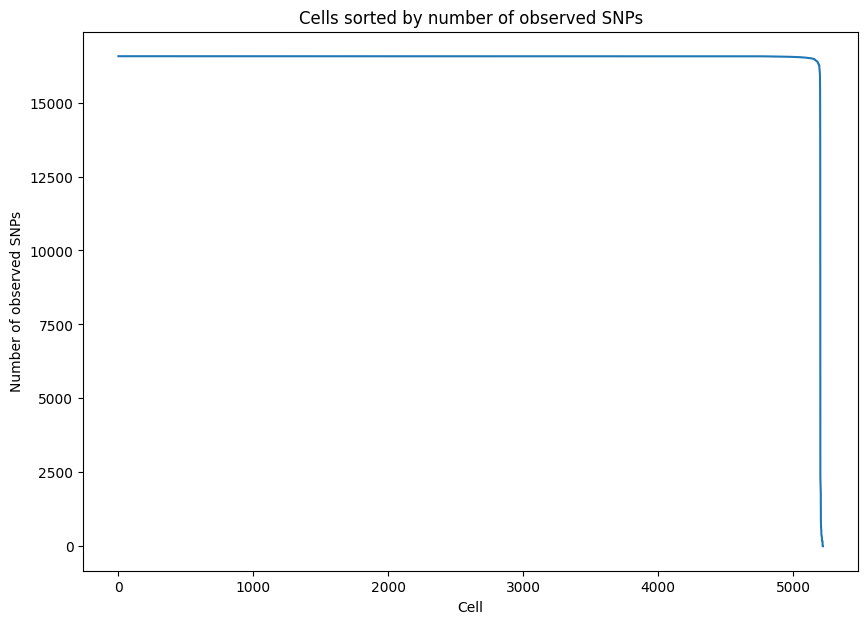

Please determine y-axis threshold in the plot to filter low-quality cells with low number of observed SNPs.   15000


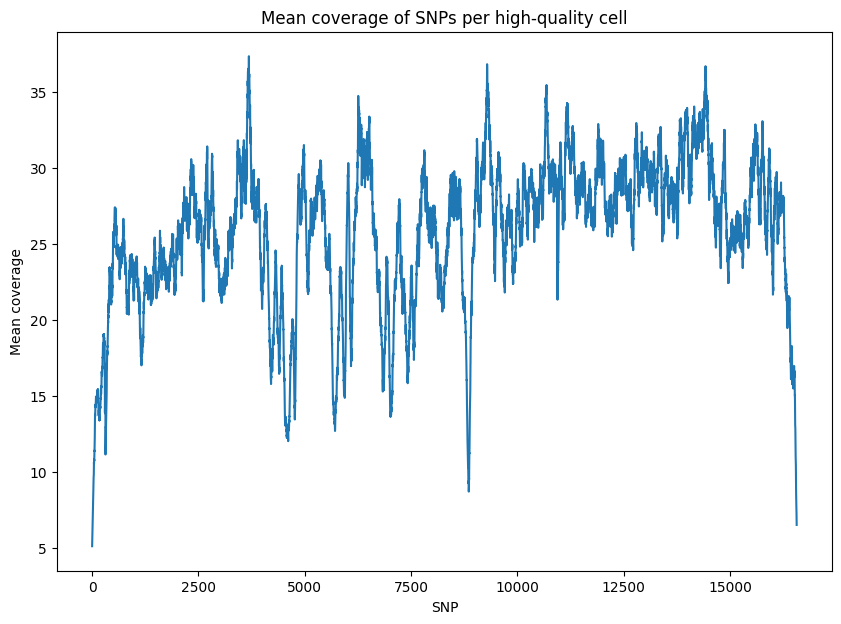

Please determine y-axis threshold in the plot to filter low-quality SNPs with low coverage.   15


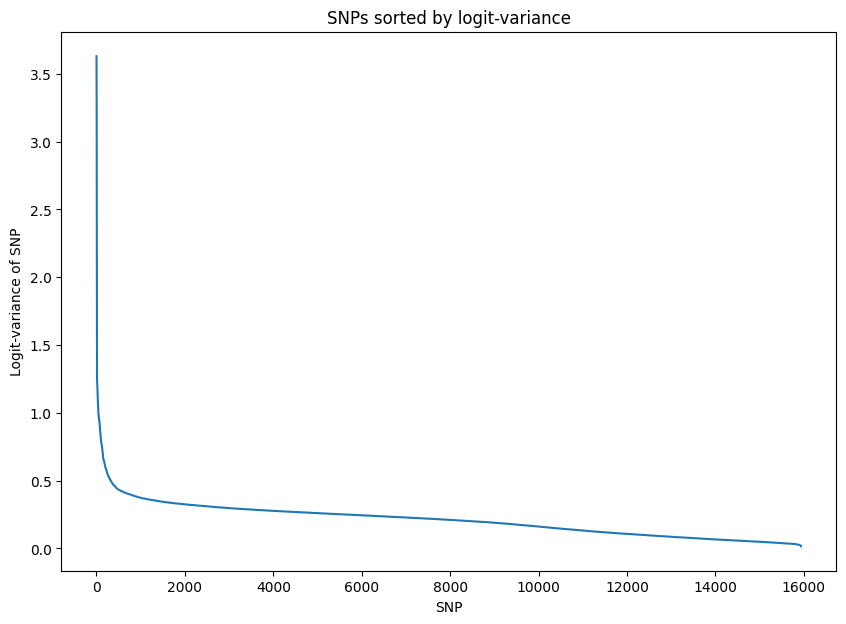

Please determine y-axis threshold in the plot to filter low-quality SNPs with low logit-variance.   0.5
Finish filtering low-quality data, 5199 cells and 322 SNPs will be used for downstream analysis.
Start training VAE.
Epoch[10/2000], Cost: 4.285382
Epoch[20/2000], Cost: 3.245173
Epoch[30/2000], Cost: 3.187488
Epoch[40/2000], Cost: 3.173056
Epoch[50/2000], Cost: 3.162857
Epoch[60/2000], Cost: 3.153944
Epoch[70/2000], Cost: 3.146011
Epoch[80/2000], Cost: 3.139112
Epoch[90/2000], Cost: 3.132000
Epoch[100/2000], Cost: 3.125513
Epoch[200/2000], Cost: 3.089026
Epoch[300/2000], Cost: 3.067698
Epoch[400/2000], Cost: 3.047435
Epoch[500/2000], Cost: 3.026851
Epoch[600/2000], Cost: 3.006317
Epoch[700/2000], Cost: 2.986320
Epoch[800/2000], Cost: 2.966655
Epoch[900/2000], Cost: 2.947238
Epoch[1000/2000], Cost: 2.928079
Epoch[1100/2000], Cost: 2.909234
Epoch[1200/2000], Cost: 2.890966
Epoch[1300/2000], Cost: 2.873487
Epoch[1400/2000], Cost: 2.857196
Epoch[1500/2000], Cost: 2.842323
Epoch[1600/200

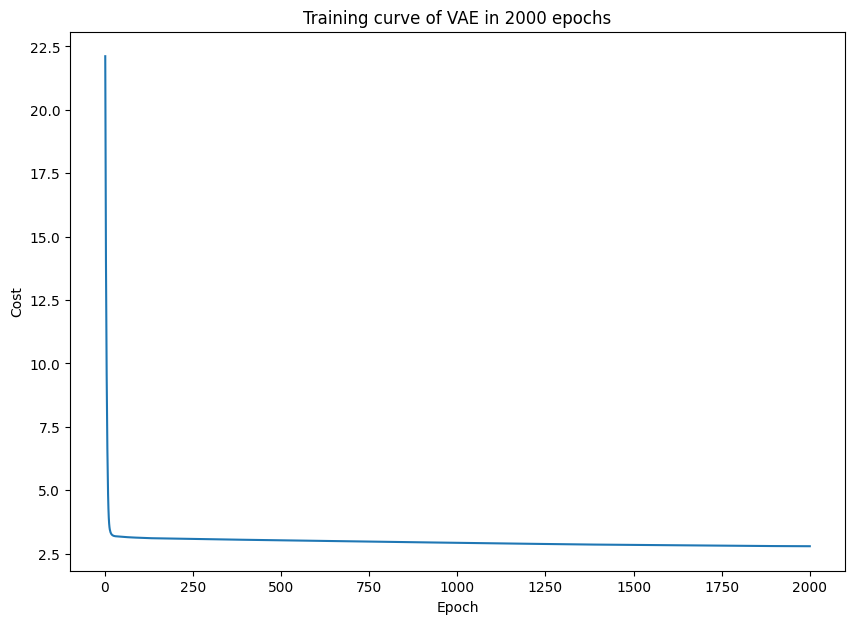

Start learning PCA and UMAP of latent space in VAE.
Finish learning, PCA and UMAP of latent space will be shown below.


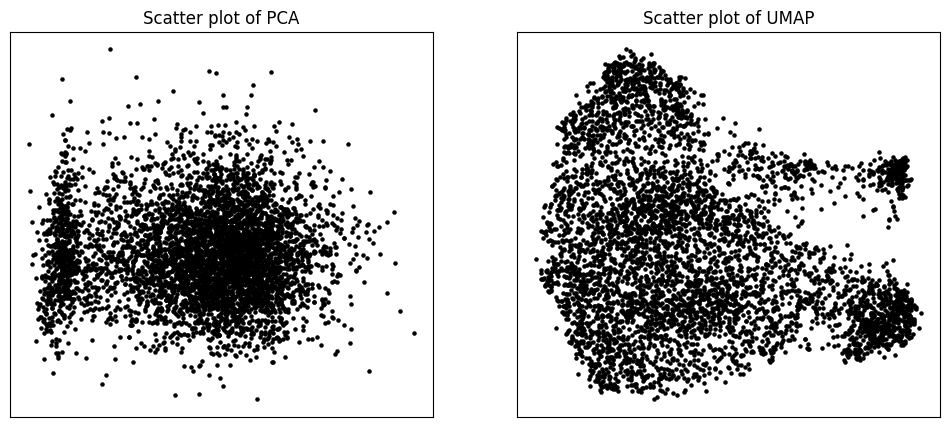

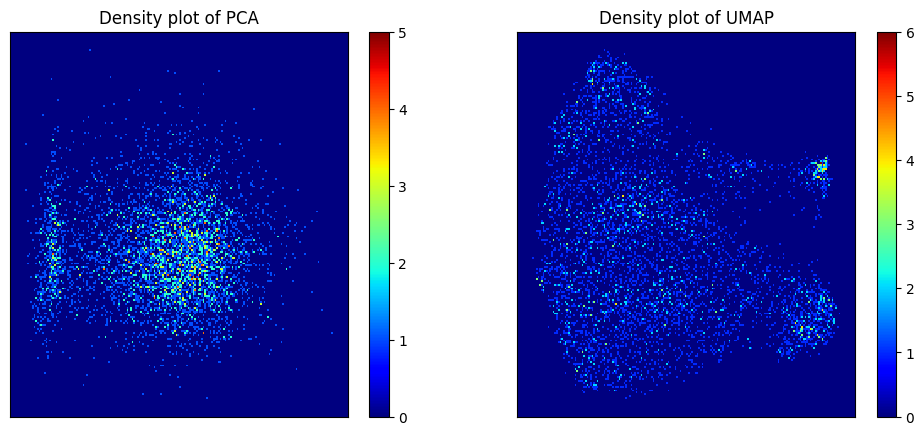

Start clustering.
2 clusters, Distortion: 9604.766602
3 clusters, Distortion: 7532.202637
4 clusters, Distortion: 5455.927734
5 clusters, Distortion: 4541.613281
6 clusters, Distortion: 4023.651123
7 clusters, Distortion: 3224.353760
8 clusters, Distortion: 2792.255127
9 clusters, Distortion: 2519.215332
10 clusters, Distortion: 2339.158691
11 clusters, Distortion: 2113.721680
12 clusters, Distortion: 1914.339111
13 clusters, Distortion: 1833.280884
14 clusters, Distortion: 1696.357910
15 clusters, Distortion: 1593.288940
16 clusters, Distortion: 1570.104980
17 clusters, Distortion: 1439.456909
18 clusters, Distortion: 1394.528564
19 clusters, Distortion: 1352.488647
20 clusters, Distortion: 1282.854736
Finish clustering, PCA, UMAP, distortion, silhouette score of K-means clustering will be shown below.


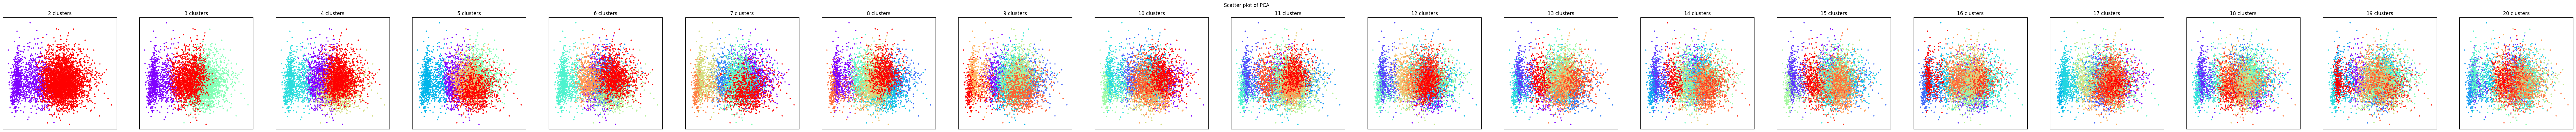

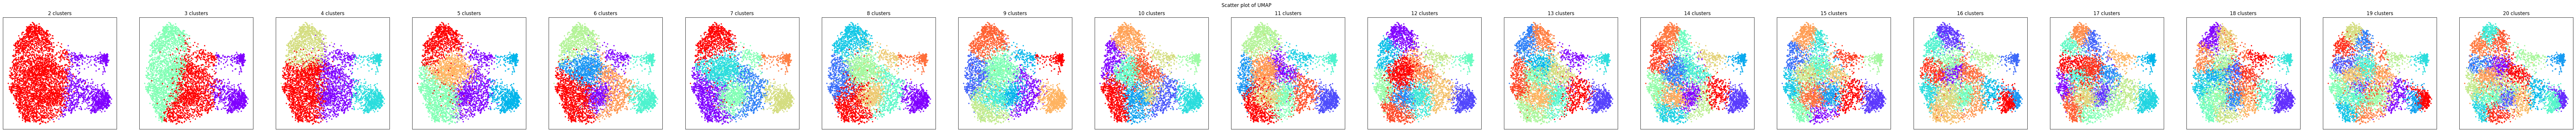

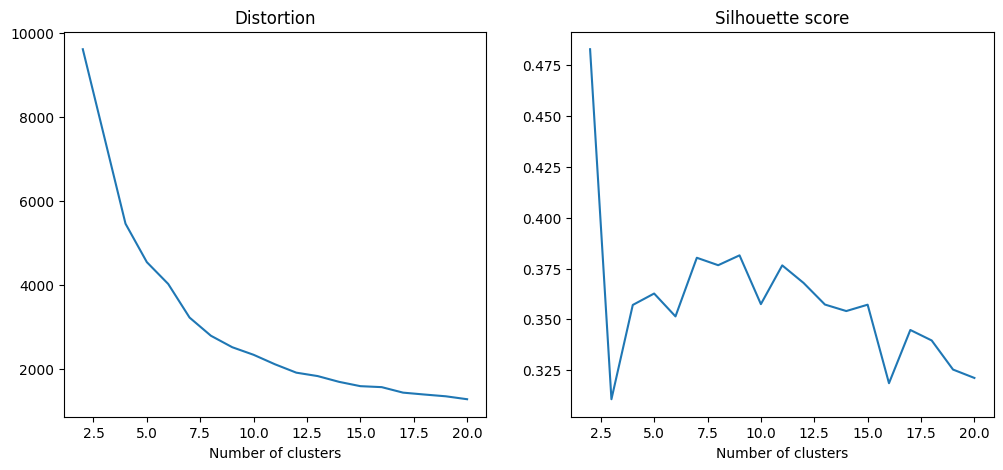

PCA and UMAP of individual clusters will be shown below.


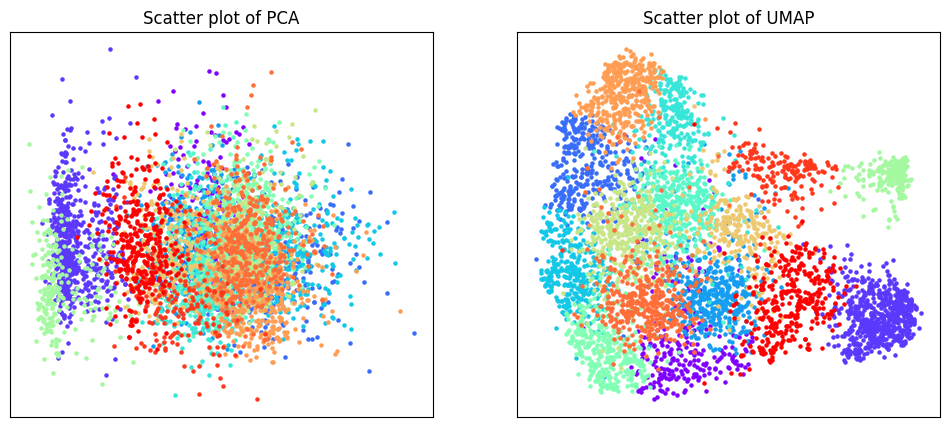

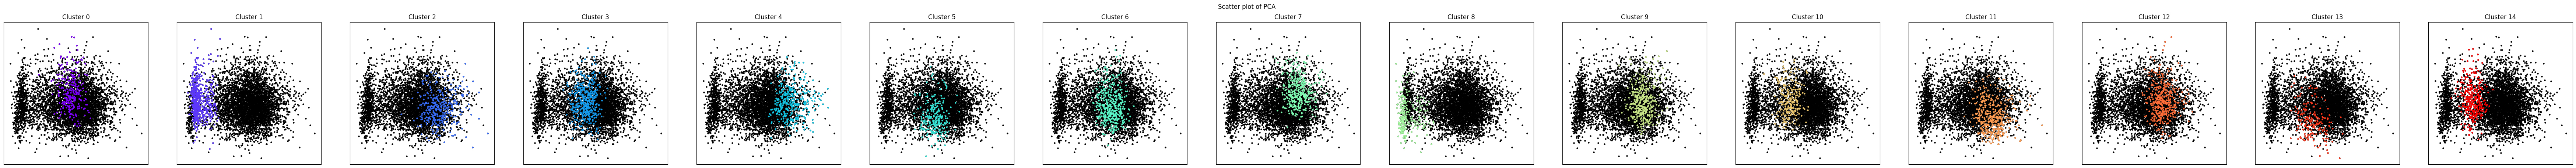

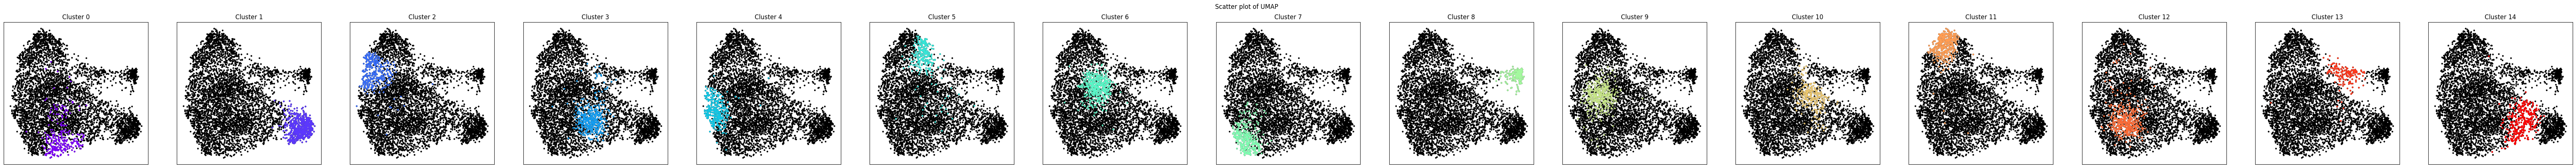

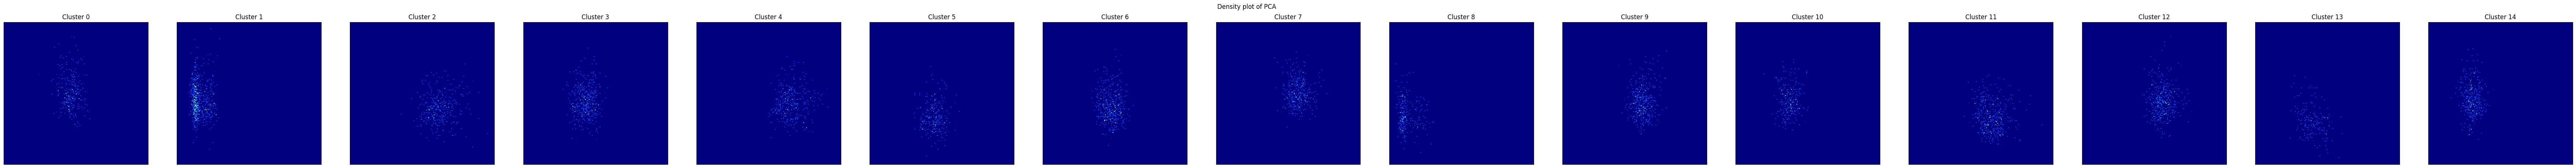

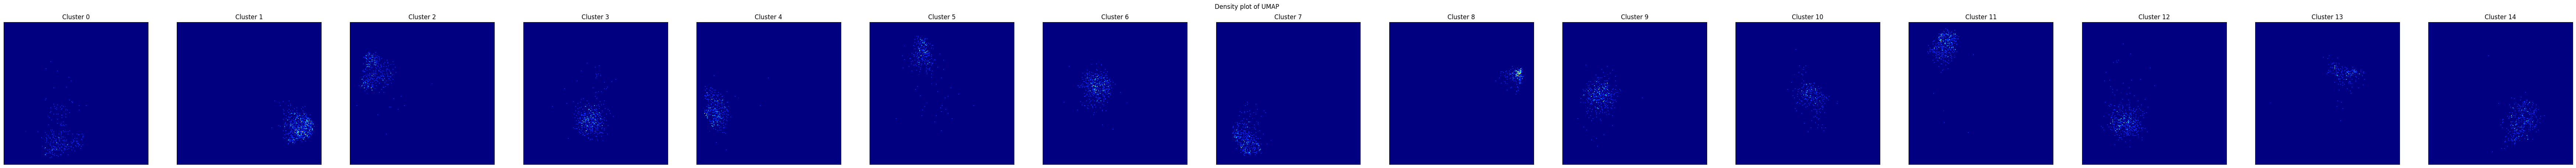

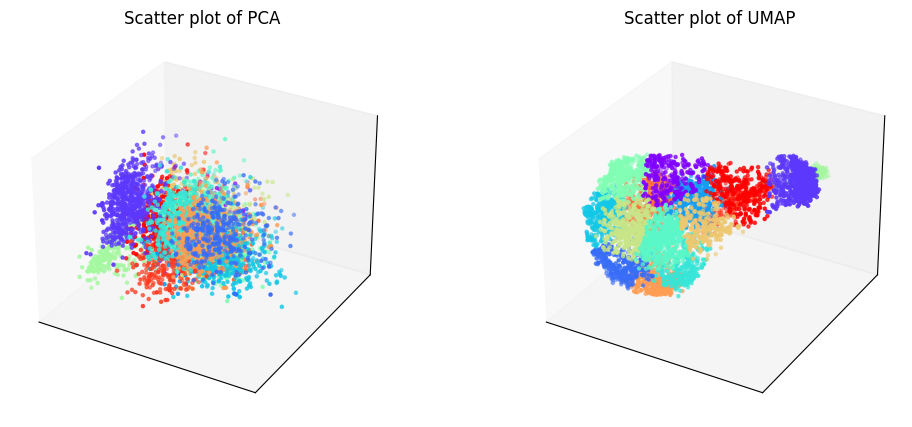

Phylogenetic tree in latent space will be shown below.


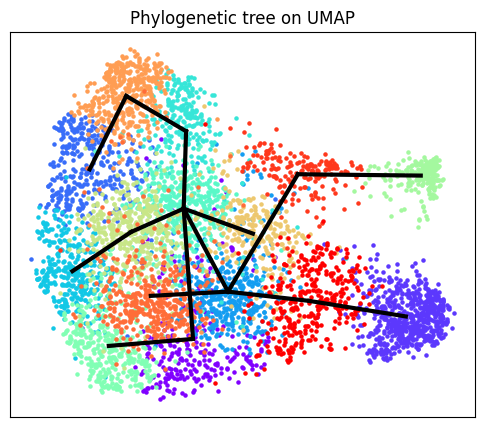

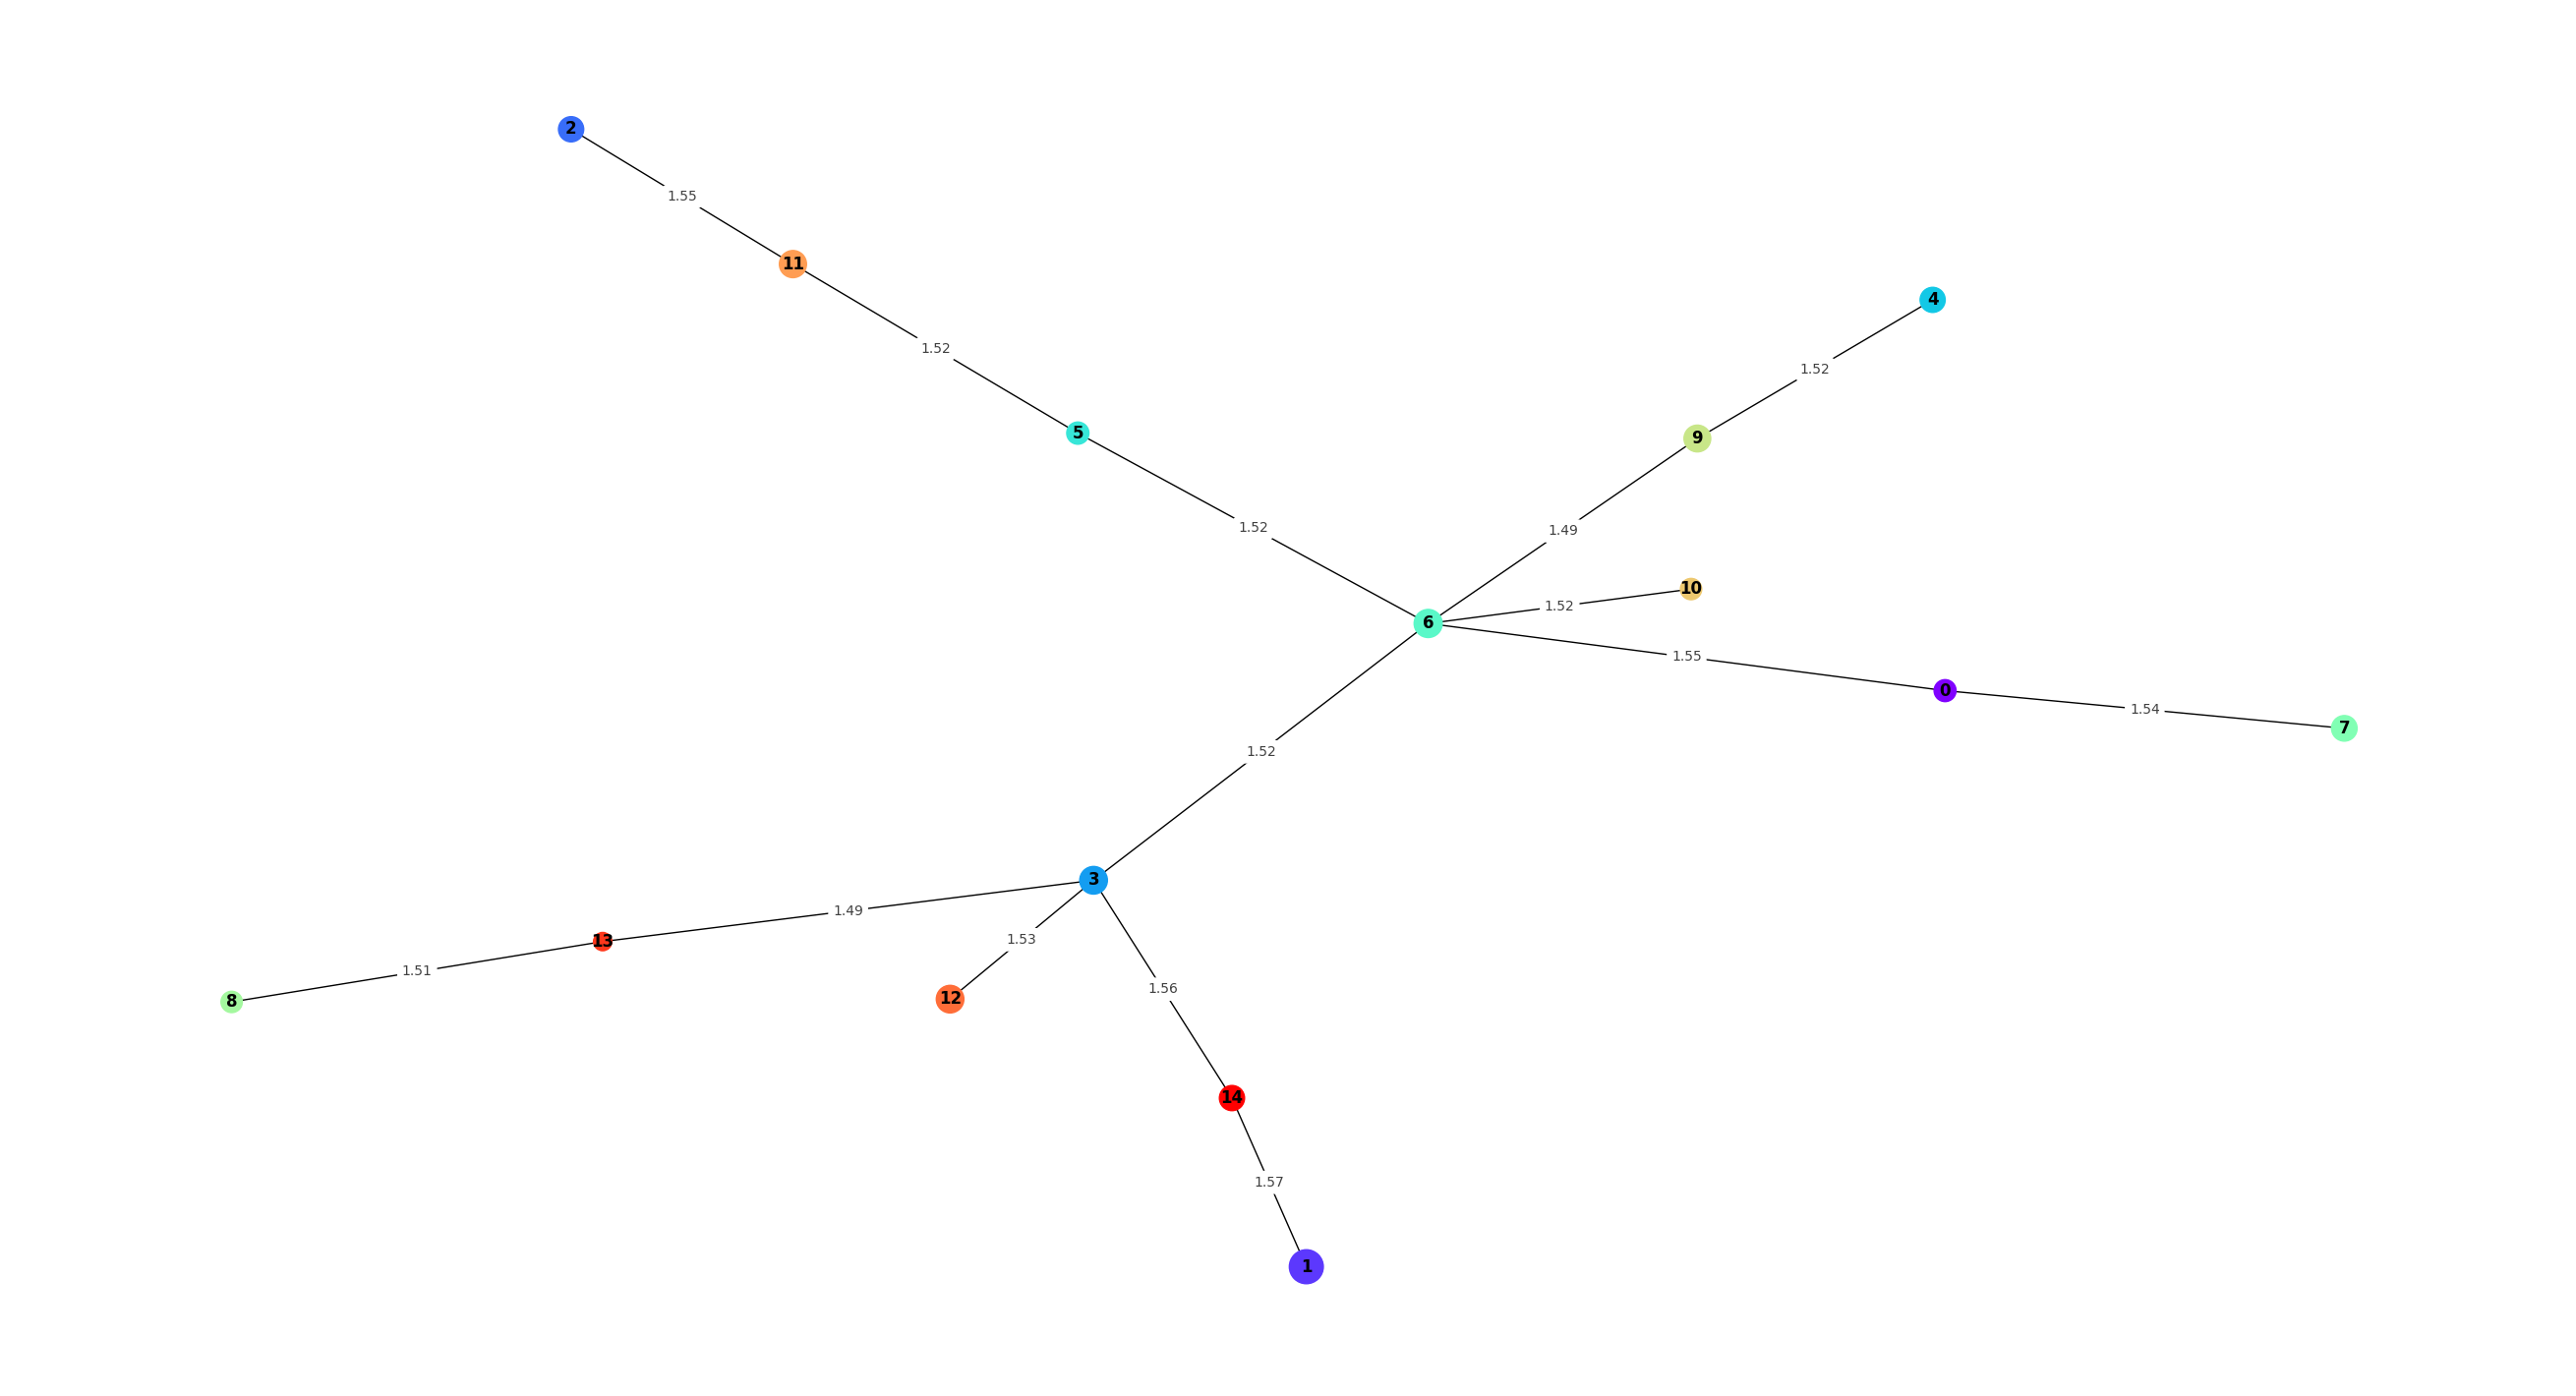

SNP-allelic ratios of 5199 cells and 50 SNPs will be shown below.


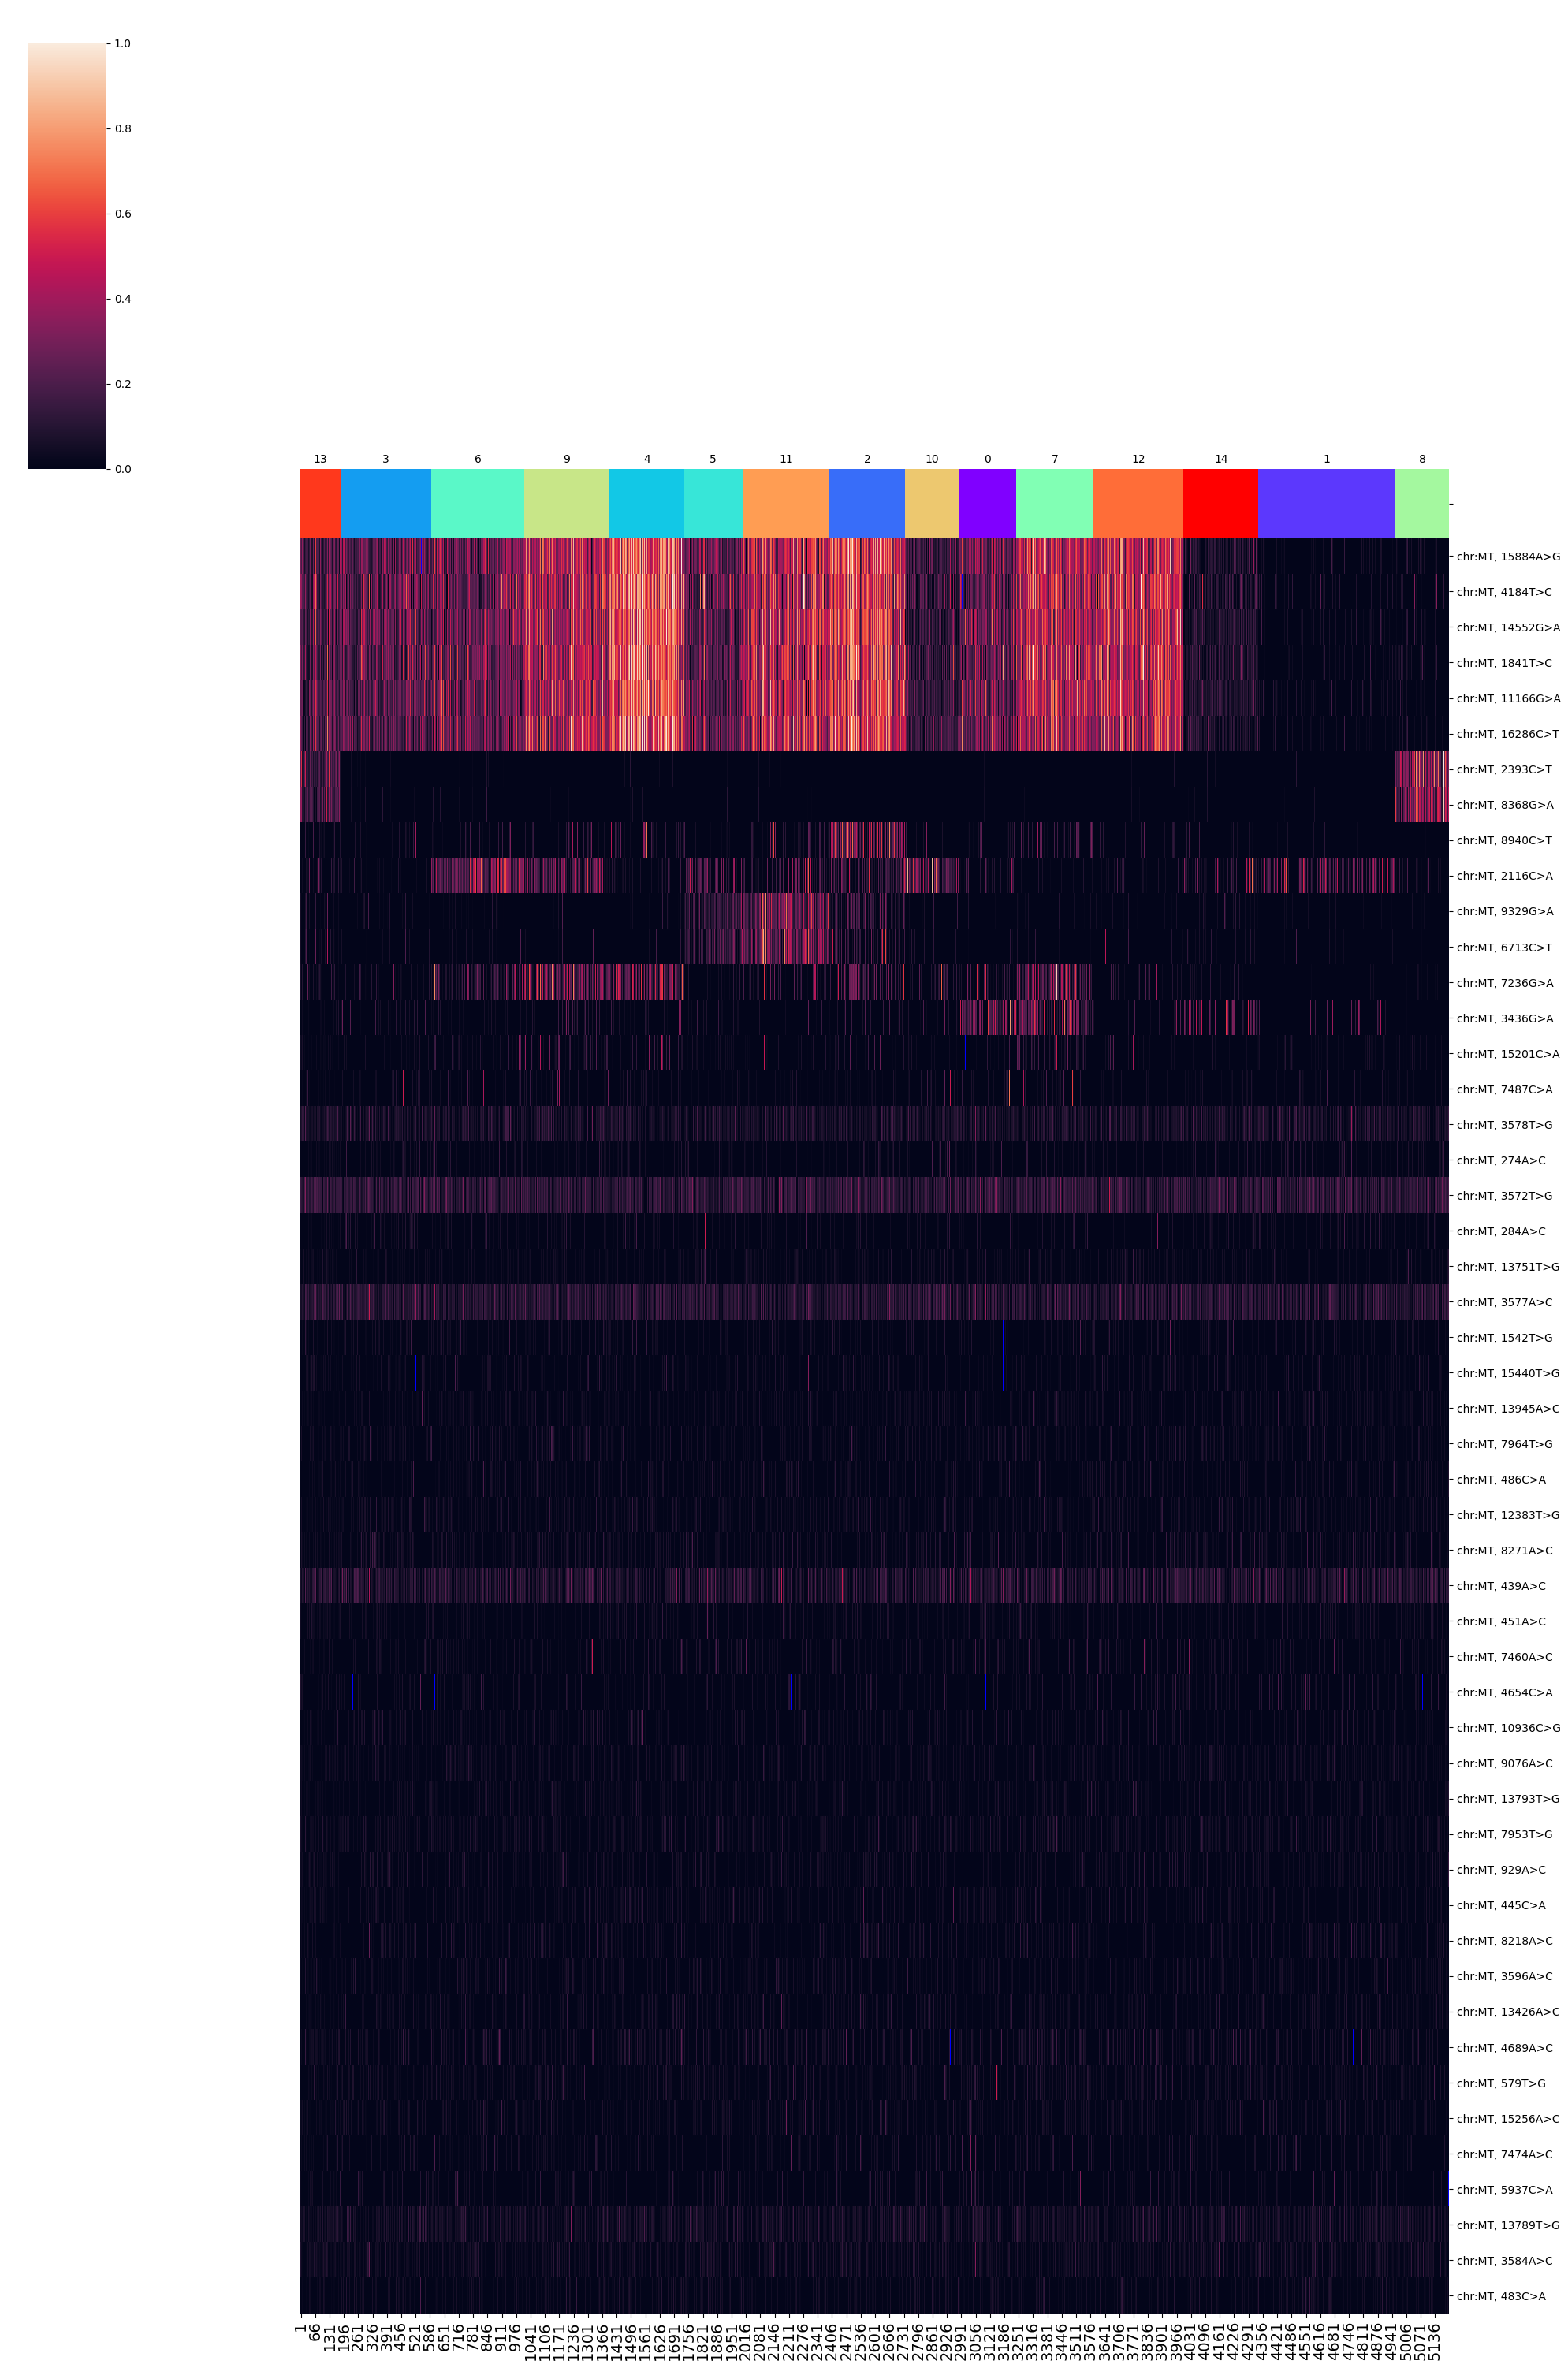

SNPs sorted by lowest p-value will be shown below


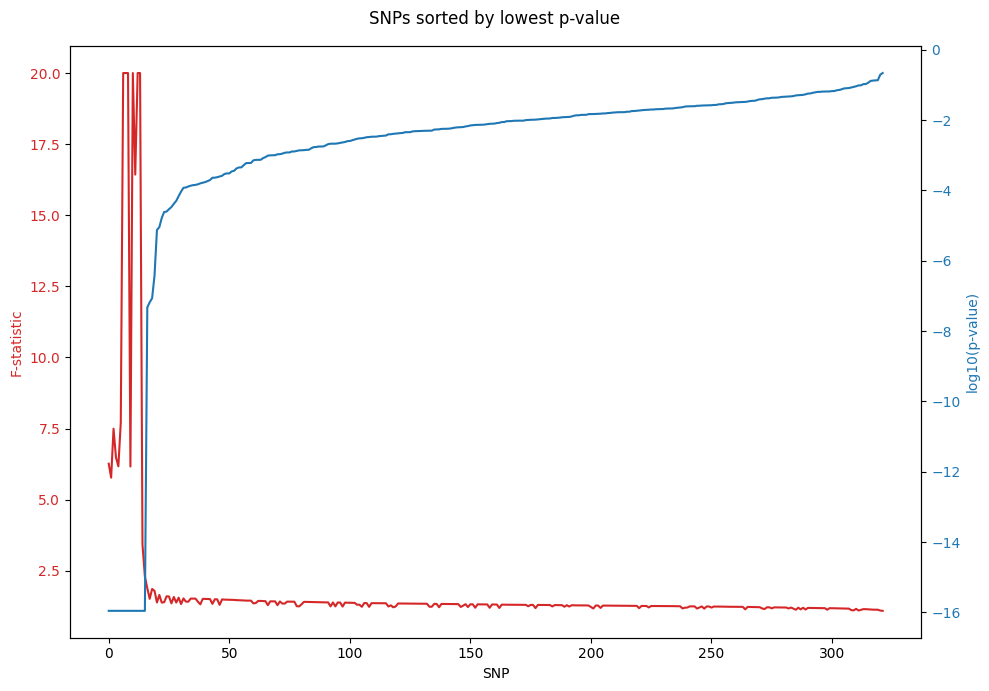

In [1]:
import torch
torch.set_default_device('cuda')
torch.cuda.set_device('cuda:4')

%run /home/kevin/storage_kevin/past_figures/figures_final7/notebook/SNPmanifold.ipynb

demo1 = SNP_VAE(path = "/home/kevin/storage_kevin/.past_datasets/mkn45")
demo1.filtering()
demo1.training()
demo1.clustering(algorithm = "kmeans_umap3d", max_cluster = 20) 
demo1.phylogeny(15)

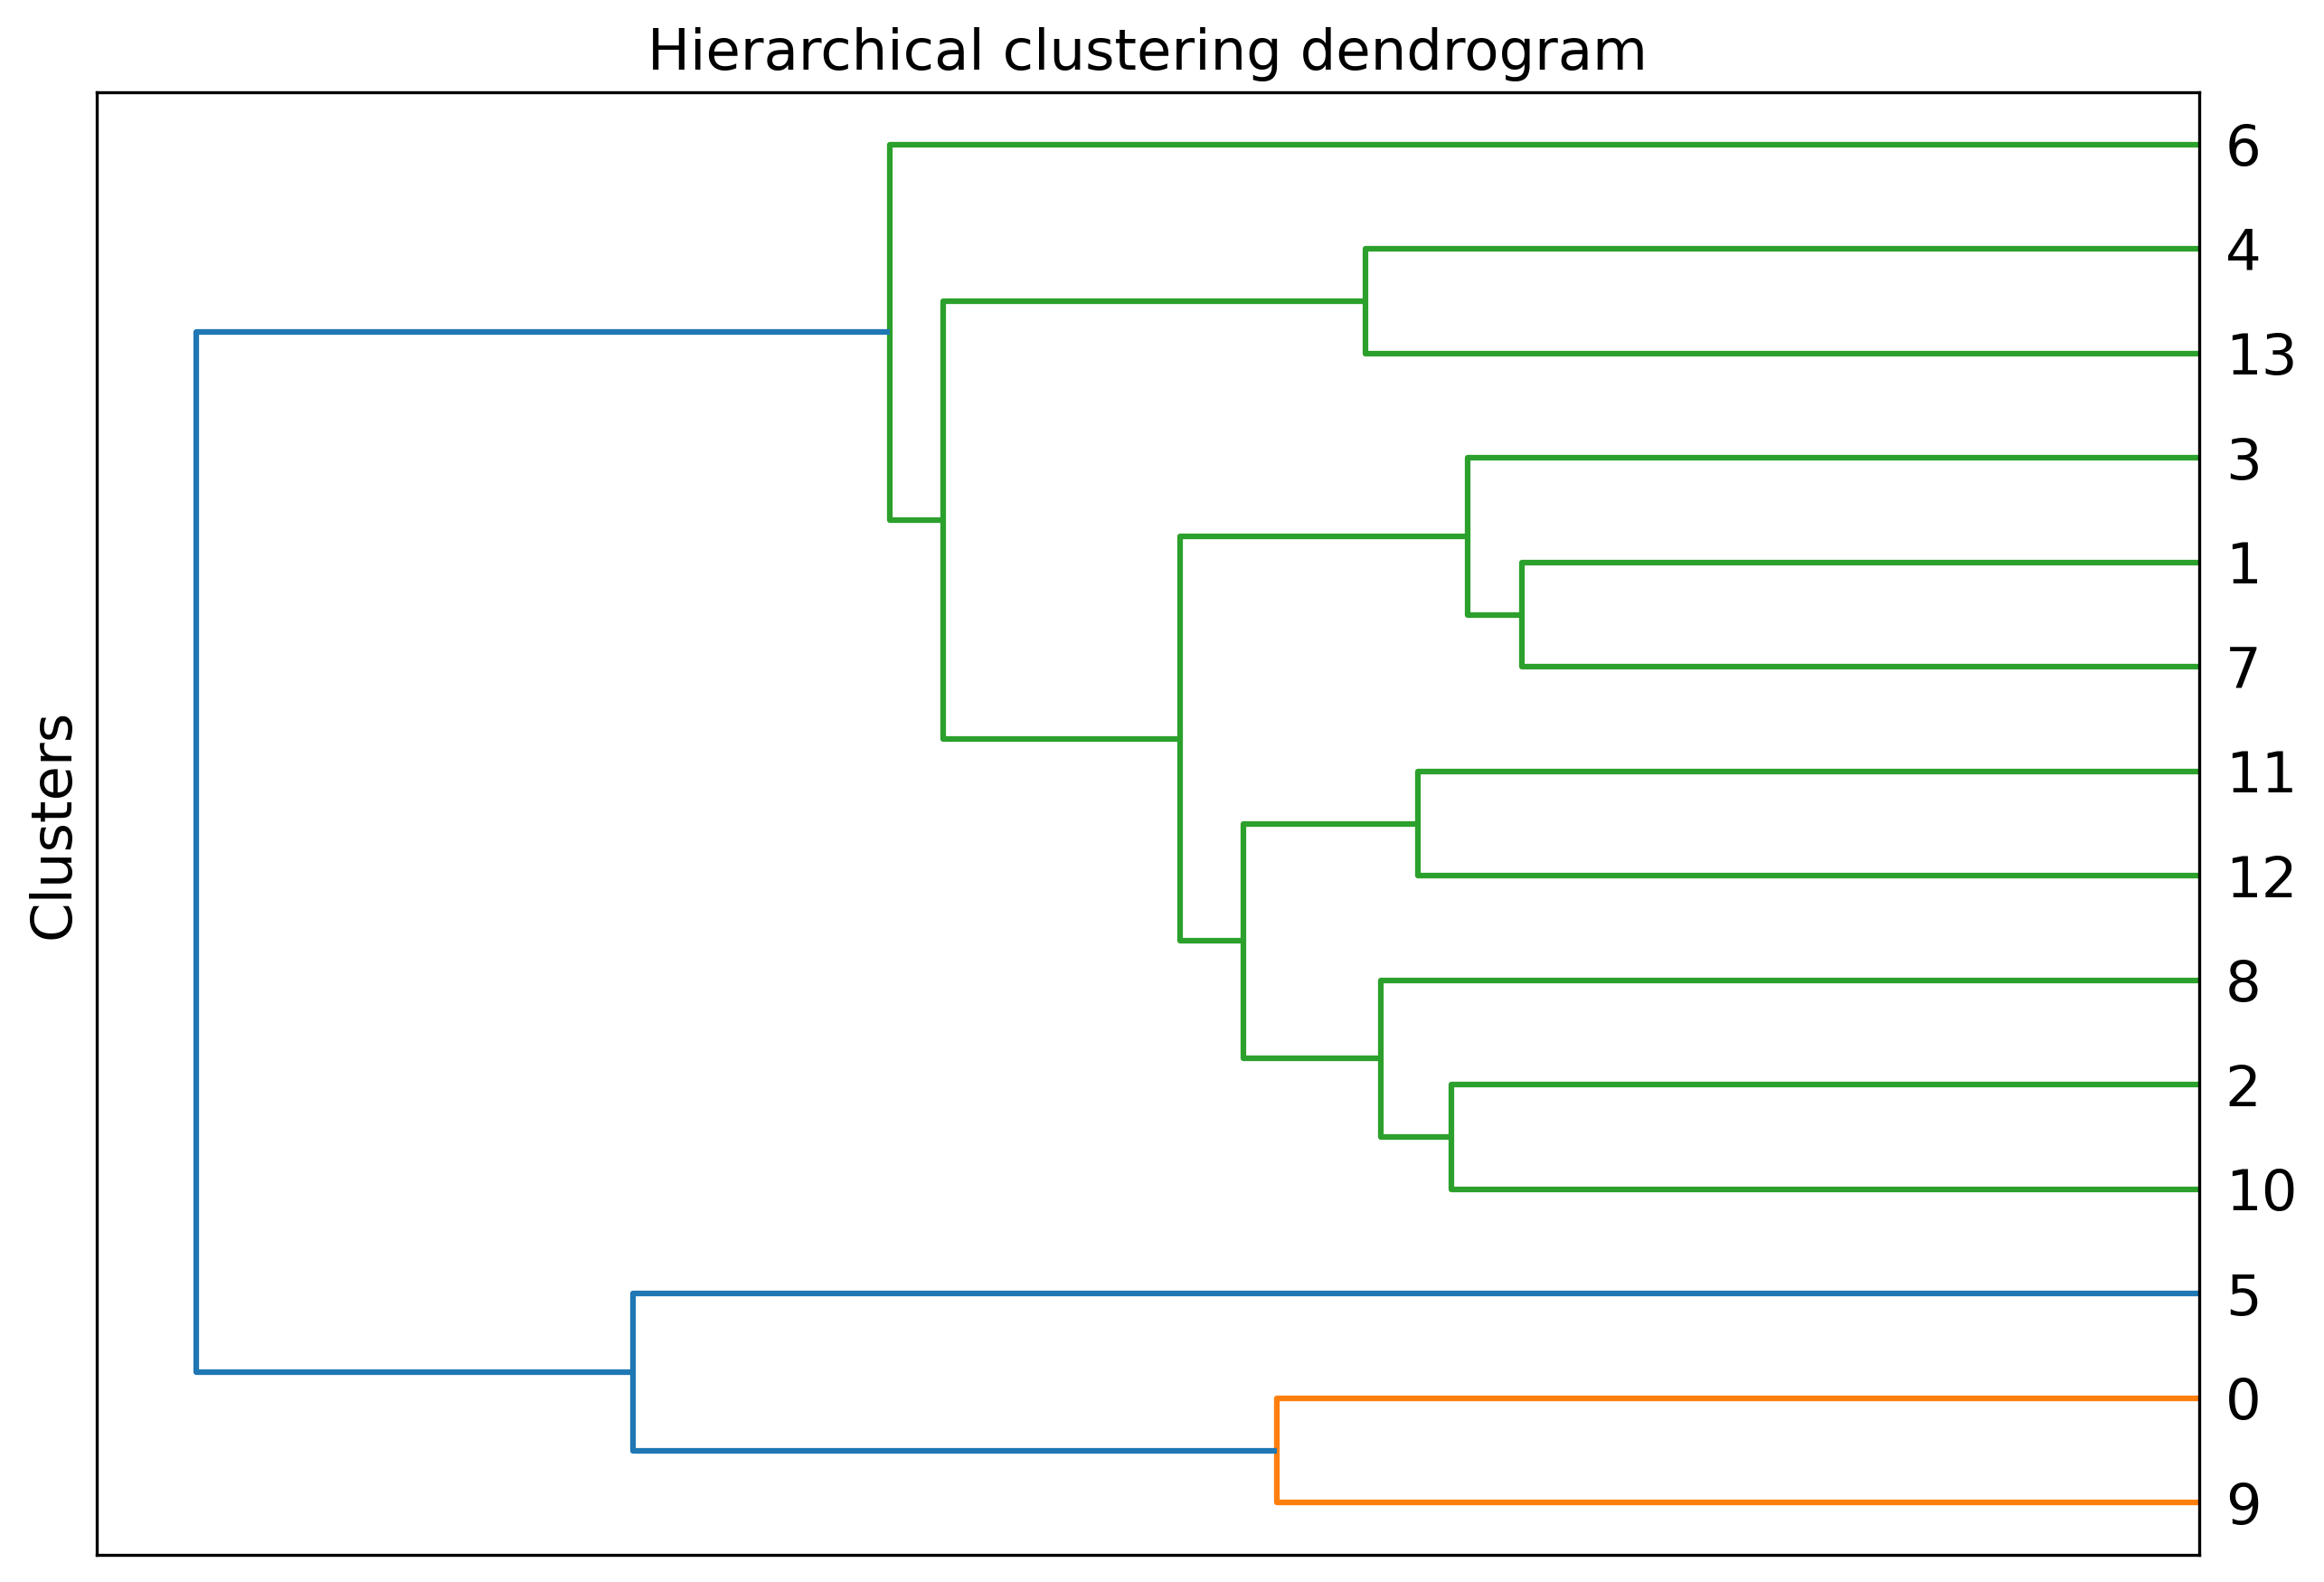

In [2]:
assinged_label = np.genfromtxt("assigned_label.csv", delimiter=",").astype(int)

clusters = []

for w in range(np.max(assinged_label) + 1):
    
    clusters.append(np.where(assinged_label == w)[0])

centre_embedding_full = np.empty((np.max(assinged_label) + 1, demo1.latent.shape[1]))
    
for w in range(np.max(assinged_label) + 1):
    
    centre_embedding_full[w, :] = np.mean(demo1.latent[clusters[w], :], 0)

from scipy.cluster.hierarchy import linkage, dendrogram

bifur_tree = linkage(centre_embedding_full, method='average')

fig, axs = plt.subplots(1, 1, figsize=(10, ((np.max(assinged_label) + 1) * 0.5)))
fig.set_dpi(300)

dendrogram(bifur_tree, orientation='left', labels=np.arange((np.max(assinged_label) + 1).astype(int)).astype(int), distance_sort='descending', show_leaf_counts=True, leaf_font_size = 15)

axs.set_title('Hierarchical clustering dendrogram', fontsize = 15)
axs.set_xticks([])
axs.set_ylabel('Clusters', fontsize = 15)
plt.show()

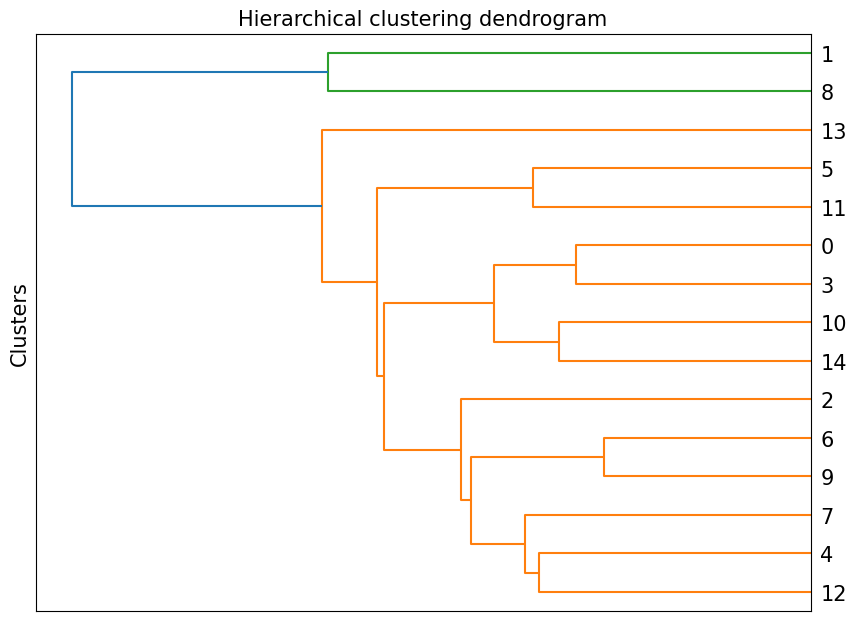

In [3]:
centre_embedding_full = np.empty((demo1.cluster_no, demo1.z_dim))

for w in range(demo1.cluster_no):
    
    centre_embedding_full[w, :] = np.mean(demo1.latent[demo1.clusters[w], :], 0)
    
bifur_tree = linkage(centre_embedding_full, method='average')

fig, axs = plt.subplots(1, 1, figsize=(10, (demo1.cluster_no * 0.5)))

dendrogram(bifur_tree, orientation='left', labels = np.arange(demo1.cluster_no).astype(int), distance_sort='descending', show_leaf_counts=True, leaf_font_size = 15)

axs.set_title('Hierarchical clustering dendrogram', fontsize = 15)
axs.set_xticks([])
axs.set_ylabel('Clusters', fontsize = 15)
plt.show()

/ssd/users/kevin/conda/test_SNPmanifold/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Start loading raw data.
Finish loading raw data.
Start filtering low-quality cells and SNPs.


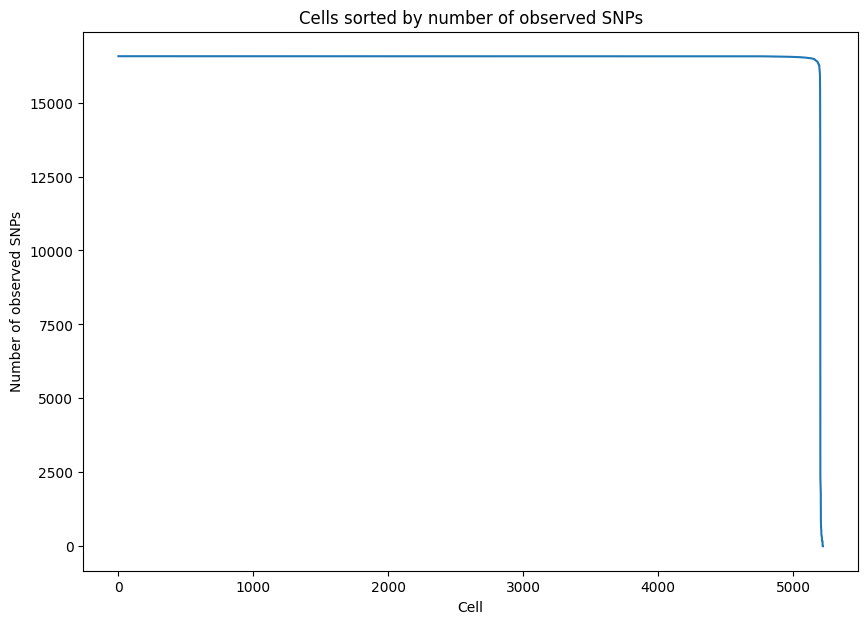

Please determine y-axis threshold in the plot to filter low-quality cells with low number of observed SNPs.   15000


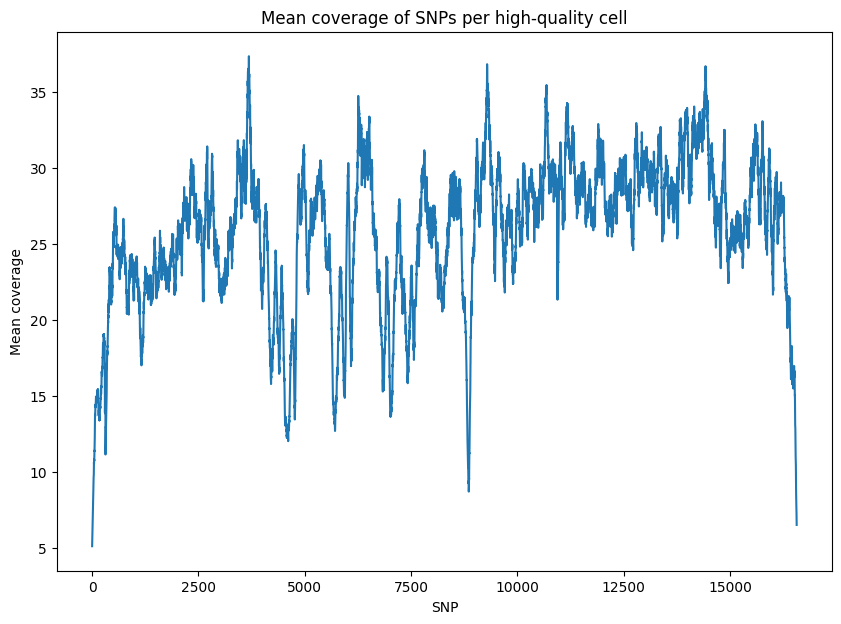

Please determine y-axis threshold in the plot to filter low-quality SNPs with low coverage.   15


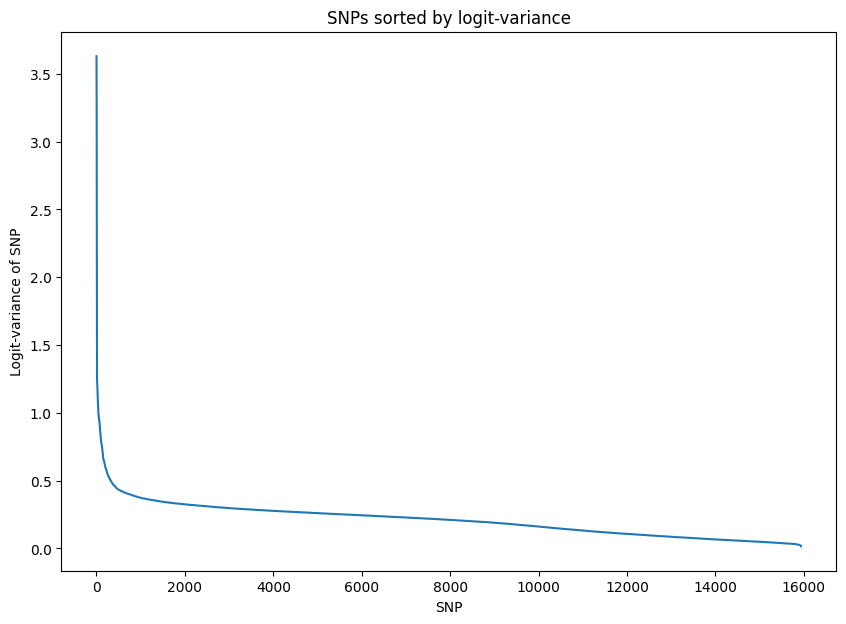

Please determine y-axis threshold in the plot to filter low-quality SNPs with low logit-variance.   0.5
Finish filtering low-quality data, 5199 cells and 322 SNPs will be used for downstream analysis.


In [1]:
import torch
torch.set_default_device('cuda')
torch.cuda.set_device('cuda:4')

%run /home/kevin/storage_kevin/past_figures/figures_final7/notebook/SNPmanifold.ipynb

demo1 = SNP_VAE(path = "/home/kevin/storage_kevin/.past_datasets/mkn45")
demo1.filtering()

In [14]:
assinged_label = np.genfromtxt("assigned_label.csv", delimiter=",").astype(int)
df = pd.read_csv('/home/kevin/storage_kevin/.past_datasets/mkn45/MKN45_clones.csv', delimiter = ',')[demo1.cell_filter]

In [22]:
collections.Counter(df['CNV nodes'])

Counter({'node_10114': 2121,
         'node_10292': 1259,
         'node_10409': 525,
         'node_10437': 671,
         'node_10050': 301,
         'node_10324': 301,
         'node_58': 1,
         'node_8953': 3,
         'node_544': 1,
         'node_10423': 5,
         'node_10379': 5,
         'node_10433': 1,
         'node_2289': 1,
         'node_10051': 3,
         'node_10386': 1})

In [30]:
collections.Counter(assinged_label[df['CNV nodes'] == 'node_10050'])

Counter({5: 135,
         6: 67,
         8: 2,
         7: 16,
         9: 9,
         4: 7,
         2: 12,
         3: 5,
         0: 17,
         10: 19,
         13: 6,
         11: 3,
         1: 2,
         12: 1})

In [57]:
np.sum(np.logical_and(df['CNV nodes'] == 'node_10050', np.logical_or(assinged_label == 5, assinged_label == 6)))

202

In [58]:
np.sum(np.logical_and(df['CNV nodes'] != 'node_10050', np.logical_or(assinged_label == 5, assinged_label == 6)))

257

In [62]:
np.sum(np.logical_and(df['CNV nodes'] == 'node_10050', np.logical_and(assinged_label != 5, assinged_label != 6)))

99

In [64]:
np.sum(np.logical_and(df['CNV nodes'] != 'node_10050', np.logical_and(assinged_label != 5, assinged_label != 6)))

4641

In [65]:
202 * 4641 / 257 / 99

36.8463624572574

In [35]:
(135 + 67) / np.sum(df['CNV nodes'] == 'node_10050')

0.6710963455149501